In [1]:
import numpy as np
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
train = pd.read_csv("/content/drive/MyDrive/training.csv")

In [4]:
train.head()

,text,label
0,i didnt feel humiliated,0
1,i can go from feeling so hopeless to so damned...,0
2,im grabbing a minute to post i feel greedy wrong,3
3,i am ever feeling nostalgic about the fireplac...,2
4,i am feeling grouchy,3


In [7]:
train.shape[0] # Number of rows

16000

In [8]:
train.shape[1] # Number of columns

2

In [9]:
train.duplicated().sum()

1

In [10]:
train = train.drop_duplicates()

In [11]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15999 entries, 0 to 15999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    15999 non-null  object
 1   label   15999 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 375.0+ KB


In [12]:
import warnings
import tensorflow as tf
from tensorflow import keras
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [84]:
import plotly.express as px
import plotly.graph_objects as go
train['length_of_text'] = [len(i.split(' ')) for i in train['text']] # Splits each string in text and counts the number of words in each string

fig = px.histogram(train['length_of_text'], marginal='box',
                   x="length_of_text", color_discrete_sequence = ['#ee3322']) # marginal = 'box' shows a boxplot at the top

fig.update_traces(marker=dict(line=dict(color='#eeaa00', width=2)))
fig.update_layout(title_text='Distribution of the Length of the Texts',
                  title_x=0.5, title_font=dict(size=22))
fig.show()

In [23]:
FreqOfWords = train['text'].str.split(expand=True).stack().value_counts()
FreqOfWords_top200 = FreqOfWords[:200]

fig = px.treemap(FreqOfWords_top200, path=[FreqOfWords_top200.index], values=0)
fig.update_layout(title_text='Frequency of the Words in the Train Dataset',
                  title_x=0.5, title_font=dict(size=22)
                  )
fig.update_traces(textinfo="label+value")
fig.show()

In [54]:
train.label.unique()

array([0, 3, 2, 5, 4, 1])

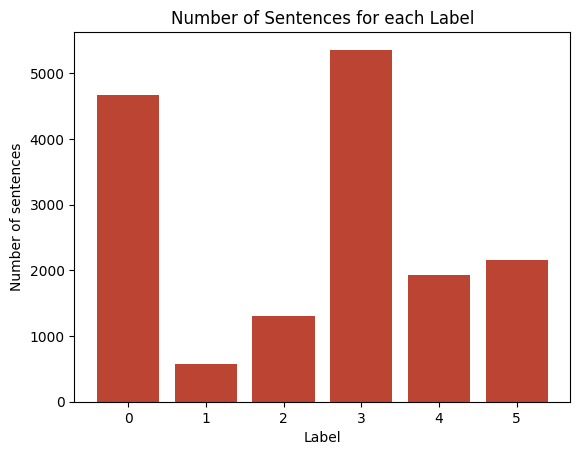

In [85]:
labelCounts = plt.bar(train.label.unique(), height = train['label'].value_counts().sort_index(), color = '#bb4433')
plt.xlabel("Label")
plt.ylabel("Number of sentences")
plt.title("Number of Sentences for each Label")
plt.show()